In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

df = pd.read_csv('blobs2.csv')
data = np.array(df.values)

###1###

x >= a

Точка поломки = 2, т.к. не сможем взять только меньшую из 2-х точек

d_{vc} = 2-1 = 1

m_{H}(N) = N + 1

m_{H}(N) <= C_{N}^0 + C_{N}^1 = 1 + N - True

a <= x <= b

Точка поломки = 3, т.к. не сможем взять одновременно меньшую и большую из 3-х точек, для случая 2-х все варианты сможем

 d_{vc} = 3-1 = 2
 
 m_{H}(N) = (N+1)*N/2+1
 
 m_{H}(N) <= C_{N}^0 + C_{N}^1 + C_{N}^2 = 1 + N + (N-1)*N/2 = (N+1)*N/2+1 - True


In [2]:
###2###
w = np.random.randn(2)
cur_err = np.sum(((np.dot(data[:,0:2],w.T)>=0)-data[:,2])**2)
best_w = w
k = 0
while(cur_err/data.shape[0] > 0.1):
    for elem in data:
        if not (np.sum(elem[0:2]*w)>=0) == elem[2]:
            w = w + 2*(elem[2]-0.5)*elem[0:2]
            temp_err = np.sum(((np.dot(data[:,0:2],w.T)>=0)-data[:,2])**2)
            if temp_err < cur_err:
                best_w = w
                cur_err = temp_err
# print(cur_err/data.shape[0])

In [3]:
col = "bg"
def draw1():
    for elem in data:
        if np.sum(elem[0:2]*best_w)>=0:
            plt.scatter(elem[0], elem[1], c='b')
        else:
            plt.scatter(elem[0], elem[1], c='g')
    x = np.array([-1,4])
    y = -x*best_w[0]/best_w[1]
    plt.plot(x, y, color='r')
    plt.show()

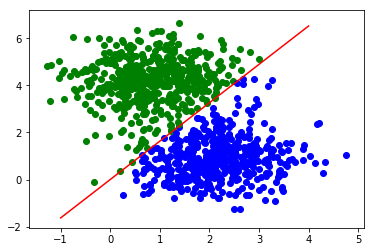

0.053


In [4]:
draw1()
print(cur_err/data.shape[0])

In [5]:
###3###
new_data = np.zeros((data.shape[0],6))
new_data[:,0:2] = data[:,0:2]
new_data[:,2:4] = data[:,0:2]**2
new_data[:,4] = data[:,0]*data[:,1]
new_data[:,5] = data[:,2]

In [6]:
def fun(new_data, err=0.1):
    w1 = np.random.randn(new_data.shape[1]-1)
    cur_err1 = np.sum(((np.dot(new_data[:,0:-1],w1.T)>=0)-new_data[:,-1])**2)
    best_w1 = w1
    # x_err = range(8000)
    # y_err = []
    while(cur_err1/new_data.shape[0] > err):
        for elem in new_data:
            if not (np.sum(elem[0:-1]*w1)>=0) == elem[5]:
                w1 = w1 + 2*(elem[-1]-0.5)*elem[0:-1]#(elem[5] - (np.sum(elem[0:5]*w1)>=0)
                temp_err = np.sum(((np.dot(new_data[:,0:-1],w1.T)>=0)-new_data[:,-1])**2)
                if temp_err < cur_err1:
                    best_w1 = w1
                    cur_err1 = temp_err
    return cur_err1, best_w1
    #                 print(temp_err)
    #         y_err.append(cur_err)
cur_err1, best_w1 = fun(new_data)
# print(cur_err1/new_data.shape[0])
# plt.plot(x_err, y_err, color='r')
# plt.show()

In [7]:
def draw2():
    for elem in new_data:
        if np.sum(elem[0:-1]*best_w1)>=0:
            plt.scatter(elem[0], elem[1], c='b')
        else:
            plt.scatter(elem[0], elem[1], c='g')
    x_t1 = np.arange(-1.5, 7, 0.01)
    x_t2 = np.arange(7, -1.5, -0.01)
    y_t1 = (-best_w1[1] - best_w1[4]*x_t1 + np.sqrt((best_w1[1] + best_w1[4]*x_t1)**2 -4*best_w1[3]*(best_w1[2]*x_t1*x_t1 + best_w1[0]*x_t1)))/(2*best_w1[3])
    y_t2 = (-best_w1[1] - best_w1[4]*x_t2 - np.sqrt((best_w1[1] + best_w1[4]*x_t2)**2 -4*best_w1[3]*(best_w1[2]*x_t2*x_t2 + best_w1[0]*x_t2)))/(2*best_w1[3])
    plt.plot(x_t1, y_t1, color='r')
    plt.plot(x_t2, y_t2, color='r')
    plt.ylim(ymax=7, ymin=-1)
    plt.xlim(xmax=7, xmin=-1.5)
    plt.show()

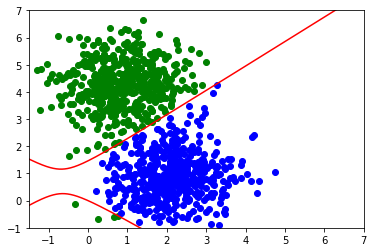

0.037


In [8]:
draw2()
print(cur_err1/new_data.shape[0])

In [9]:
data_3 = np.zeros((data.shape[0],10))
data_3[:,0:2] = data[:,0:2]
data_3[:,2:4] = data[:,0:2]**2
data_3[:,4] = data[:,0]*data[:,1]
data_3[:,5:7] = (data_3[:,2].reshape(data.shape[0],1))*data[:,0:2]
data_3[:,7:9] = (data_3[:,3].reshape(data.shape[0],1))*data[:,0:2]
data_3[:,9] = data[:,2]

In [10]:
cur_err3, best_w3 = fun(data_3, 0.2)

In [11]:
def draw3(new_data, best_w, delim=False, del_d=0):
    for elem in new_data:
        if np.sum(elem[0:-1]*best_w)>=0:
            plt.scatter(elem[0], elem[1], c='b')
        else:
            plt.scatter(elem[0], elem[1], c='g')
    if delim:
        plt.plot(del_d[:,0], del_d[:,1], color='r')
    plt.ylim(ymax=7, ymin=-1)
    plt.xlim(xmax=7, xmin=-1.5)
    plt.show()

In [12]:
def fun_3(r3_der, best_w3):
    x = r3_der[:,:,0]
    y = r3_der[:,:,1]
    return x*best_w3[0] + y*best_w3[1] + (x**2)*best_w3[2] + (y**2)*best_w3[3] + (x*y)*best_w3[4] + (x**3)*best_w3[5] +\
    ((x**2)*y)*best_w3[6] + (x*(y**2))*best_w3[7] + (y**3)*best_w3[8]
    

In [13]:
x_base = np.arange(-1.5, 6, 0.001).reshape(7500,1)
y_base = np.arange(-1, 6, 0.001).reshape(1,7000)
r3_der = np.zeros((7500,7000,2))
r3_der[:,:,0] += x_base
r3_der[:,:,1] += y_base
dists = np.abs(fun_3(r3_der, best_w3))
args_3 = np.where(dists<0.01, True, False)
res_d = r3_der[args_3]

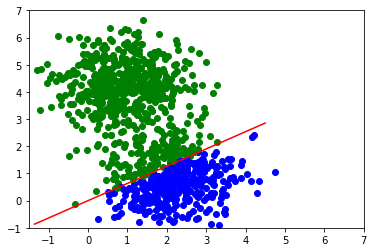

0.158


In [14]:
draw3(data_3, best_w3, True, res_d)
print(cur_err3/data_3.shape[0])

In [15]:
data_4 = np.zeros((data.shape[0],15))
data_4[:,0:9] = data_3[:,0:9]
data_4[:,9:13] = data_3[:,5:9]*(data_3[:,0].reshape(1000,1))
data_4[:,13] = data_3[:,9]*data_3[:,1]
data_4[:,14] = data[:,2]

In [16]:
cur_err4, best_w4 = fun(data_4, 0.1)

In [17]:
def fun_4(r4_der, best_w4):
    x = r4_der[:,:,0]
    y = r4_der[:,:,1]
    x_2 = x**2
    y_2 = y**2
    xy = x*y
    x_3 = x_2*x
    y_3 = y_2*y
    x_4 = x_3*x
    y_4 = x_3*y
    return x*best_w4[0] + y*best_w4[1] + x_2*best_w4[2] + y_2*best_w4[3] + xy*best_w4[4] + x_3*best_w4[5] +\
    (x_2*y)*best_w4[6] + (x*y_2)*best_w4[7] + y_3*best_w4[8] + x_4*best_w4[9] + x_3*y*best_w4[10] + \
    x_2*y_2*best_w4[11] + x*y_3*best_w4[12] + y_4*best_w4[13]

In [18]:
x4_base = np.arange(-1.5, 6, 0.001).reshape(7500,1)
y4_base = np.arange(-1, 6, 0.001).reshape(1,7000)
r4_der = np.zeros((7500,7000,2))
r4_der[:,:,0] += x4_base
r4_der[:,:,1] += y4_base
dists4 = np.abs(fun_4(r4_der, best_w4))
args_4 = np.where(dists4<0.02, True, False)
res_d4 = r4_der[args_4]

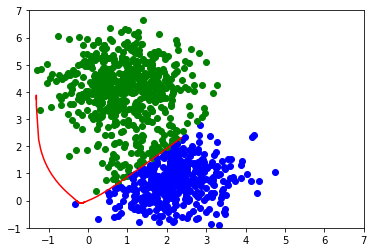

0.086


In [23]:
draw3(data_4, best_w4, True, res_d4)
print(cur_err4/data_4.shape[0])